# Linear Regression Project - Solutions

**Imports**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Get the Data**


In [3]:
customers = pd.read_csv("Ecommerce Customers")

**Checking  the head of customers dataset, and checking out its info() and describe() methods.**

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


**Exploratory Data Analysis**

In [7]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

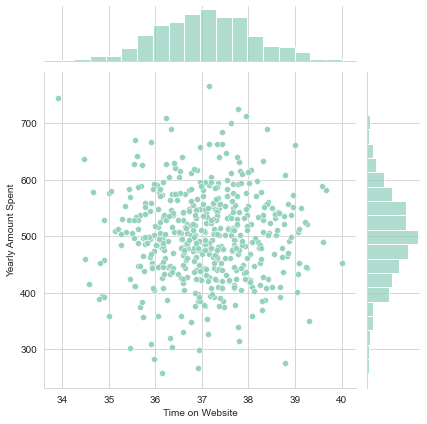

In [8]:
# More time on site, more money spent.
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

***from above we can say that the more time customer spent on website the more yearly amount he spent***

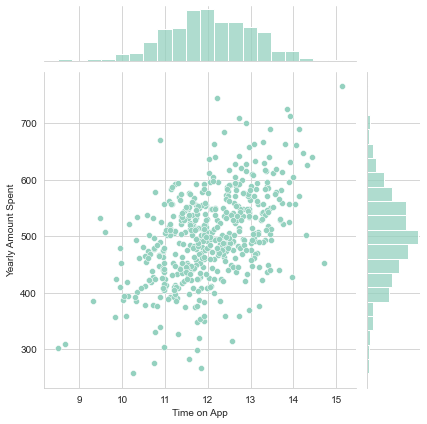

In [9]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

***customer spent most the time in mobile app and amount is also increasing with respect to time, it shows some sort of linearity***

** Using jointplot to create a 2D hex bin plot and comparing Time on App and Length of Membership.**

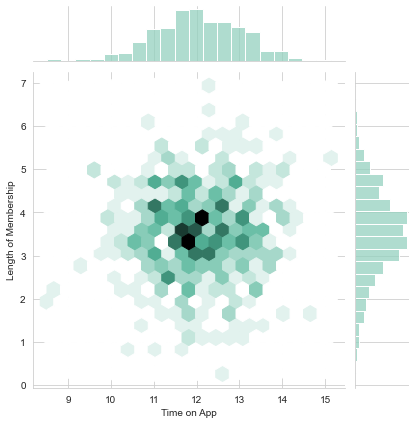

In [11]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

<AxesSubplot:xlabel='Time on App', ylabel='Length of Membership'>

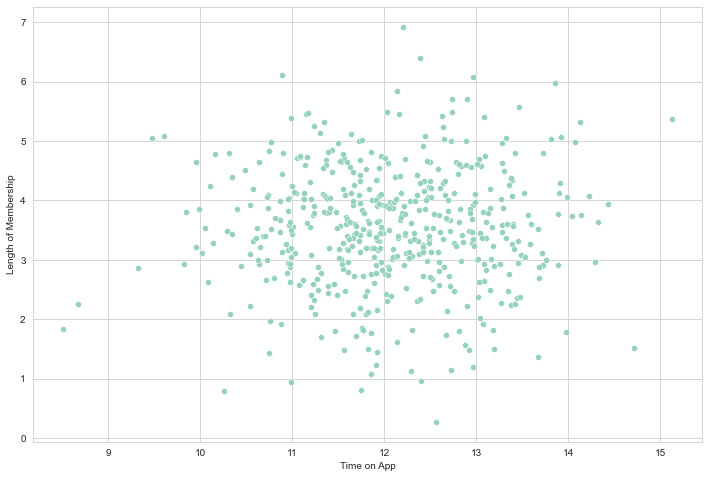

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Time on App',y='Length of Membership',data=customers)

***most of the customer spent an average of 11 to 13 minutes on app and also most people usually have 3-5 years of membership***

<AxesSubplot:xlabel='Time on Website', ylabel='Length of Membership'>

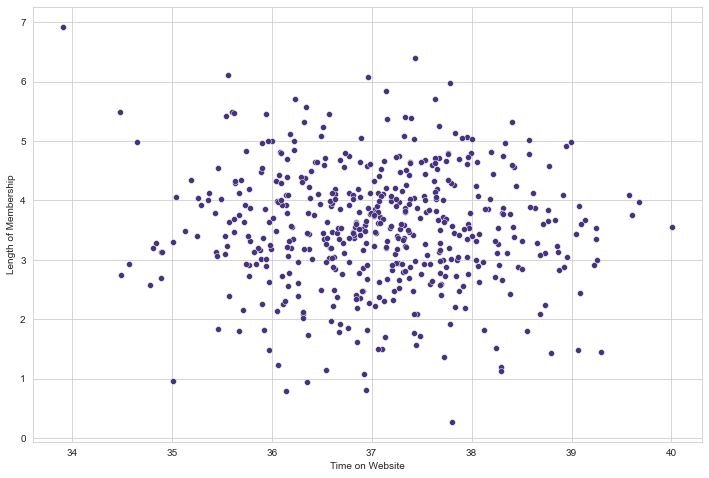

In [43]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Time on Website',y='Length of Membership',data=customers)

***from above we can also see that there is an outlier i.e., the customer spent an average of 34 minutes and he has membership of 7 years***

**Let's explore these types of relationships across the entire data set. Using [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below**

In [18]:
sns.set_palette("viridis")


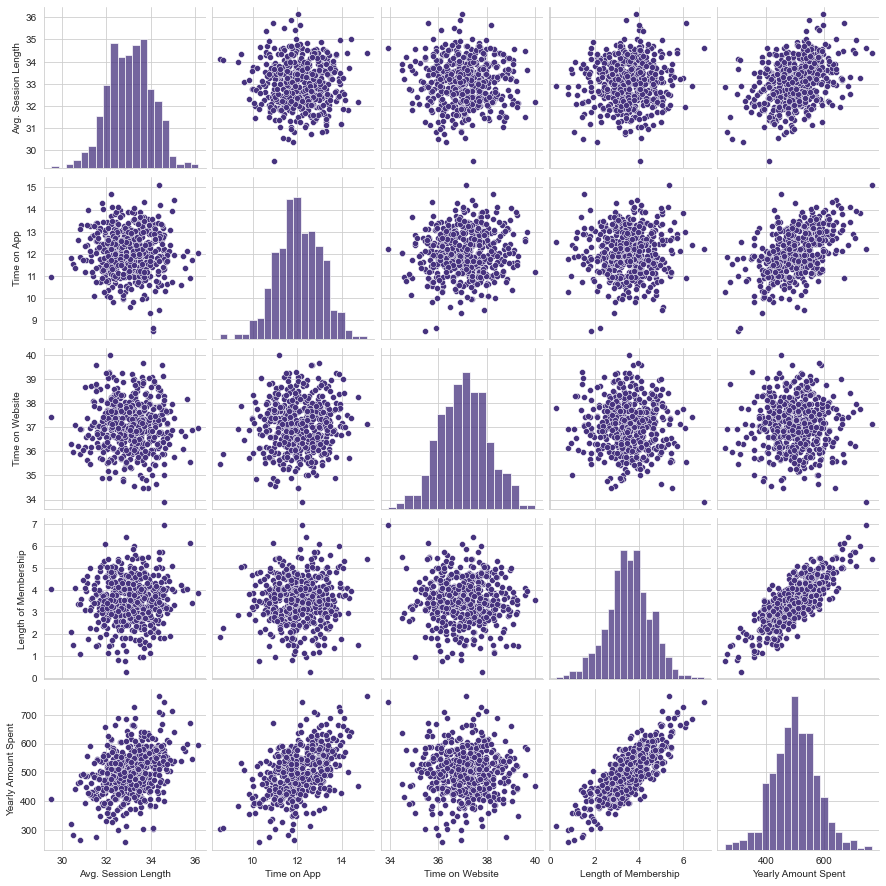

In [19]:
sns.pairplot(customers, palette='magma')

**Based off this plot we can say that the most correlated feature are lenght of membership and yearly amount spent**

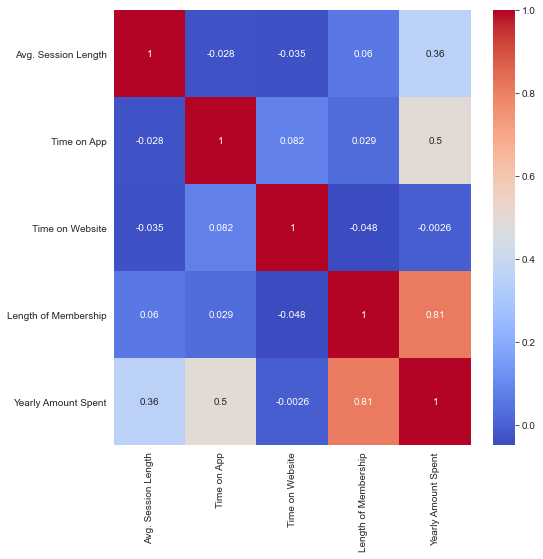

In [26]:
corr = customers.corr() # We already examined SalePrice correlations
plt.figure(figsize=(8, 8))

sns.heatmap(corr, cmap='coolwarm', annot=True);

***here also we can see that most correlated feature are lenght of membership and yearly amount spent and least correlated are Time on website and Yearly amount spent***

**Creating a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

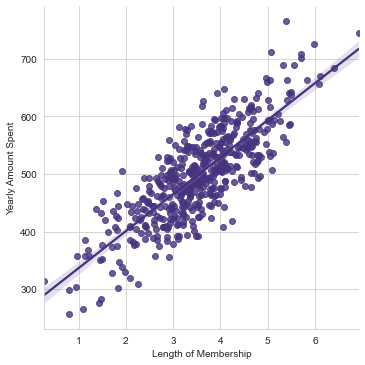

In [27]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

***this two feature show colinearity***

## Training and Testing Data

Now that we've explored the data a bit,so we'll split the data into training and testing sets.
** Setting a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [28]:
y = customers['Yearly Amount Spent']

In [29]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

** Using model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Importing LinearRegression from sklearn.linear_model **

In [32]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [33]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [34]:
lm.fit(X_train,y_train)

LinearRegression()

**coefficients of the model**

In [36]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [37]:
predictions = lm.predict( X_test)

** Creating a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

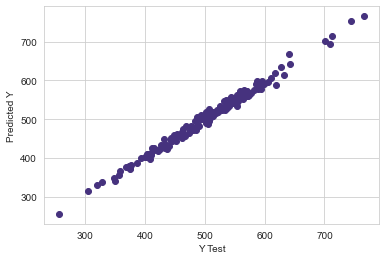

In [38]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

**Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error**

In [39]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430845
MSE: 79.81305165097471
RMSE: 8.93381506697865


## Residuals

By looking above metrics we can say that we have  gotten a very good model with a good fit. Now Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plotting a histogram of the residuals and making sure it looks normally distributed.**

C:\Users\sudee\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


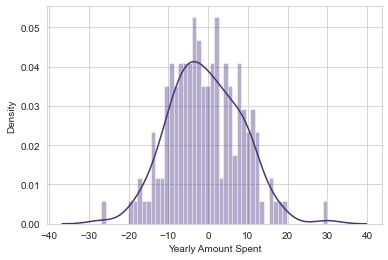

In [40]:
sns.distplot((y_test-predictions),bins=50);

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreating the dataframe below. **

In [41]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**So the the company should focus more on their mobile app or on their website?**


This is tricky, there are two ways to think about this: The company can Develop the Website to catch up to the performance of the mobile app,so the customer can be attracted or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, so we could explore the relationship between Length of Membership and the App or the Website before coming to a final conclusion!


## Thank you!
